In [108]:
import datetime

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [109]:
dataset = pd.read_csv("dataset.csv")
dataset.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [110]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [111]:
dataset.drop("Location",axis=1,inplace=True)
dataset.drop("New_Price",axis=1,inplace=True)

In [112]:
dataset

,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Mahindra Xylo D4 BSIV,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Maruti Wagon R VXI,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


In [113]:
X=dataset.drop(columns=["Price"])
y=dataset["Price"]

In [114]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.20, random_state=10)

In [115]:
Xtrain

,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
1162,Maruti Swift Dzire AMT ZDI,2016,54897,Diesel,Automatic,First,26.59 kmpl,1248 CC,74 bhp,5.0
1920,Maruti Dzire VDI,2016,45376,Diesel,Manual,First,28.4 kmpl,1248 CC,73.75 bhp,5.0
5100,Audi A4 1.8 TFSI Technology Edition,2012,80000,Petrol,Automatic,First,15.64 kmpl,1798 CC,167.62 bhp,5.0
1506,Chevrolet Optra Magnum 1.6 LT ABS BS3,2012,56000,Petrol,Manual,First,12.9 kmpl,1598 CC,102.5 bhp,5.0
5533,Hyundai Santro Xing XO eRLX Euro II,2007,72000,Petrol,Manual,Second,17.0 kmpl,1086 CC,null bhp,5.0
...,...,...,...,...,...,...,...,...,...,...
1180,Honda City i DTEC S,2014,66000,Diesel,Manual,First,26.0 kmpl,1498 CC,98.6 bhp,5.0
3441,Volkswagen CrossPolo 1.5 TDI,2015,26256,Diesel,Manual,First,20.14 kmpl,1498 CC,88.5 bhp,5.0
1344,Toyota Corolla Altis 2008-2013 1.8 VL AT,2008,78000,Petrol,Automatic,Second,14.53 kmpl,1794 CC,138.1 bhp,5.0
4623,Maruti Swift Ldi BSIV,2009,140000,Diesel,Manual,Second,17.8 kmpl,1248 CC,75 bhp,5.0


In [116]:
ytrain

1162     7.30
1920     5.75
5100    17.50
1506     2.15
5533     1.11
        ...  
1180     5.70
3441     4.25
1344     3.41
4623     2.49
1289     6.90
Name: Price, Length: 4815, dtype: float64

In [117]:
Xtrain["Name"].value_counts()

Name
Mahindra XUV500 W8 2WD                          40
Maruti Swift VDI                                35
Maruti Swift VDI BSIV                           30
Maruti Swift Dzire VDI                          27
Maruti Ritz VDi                                 26
                                                ..
Skoda Fabia 1.4 MPI Ambiente                     1
Mahindra Scorpio S2 7 Seater                     1
Nissan Sunny 2011-2014 XL AT Special Edition     1
Volkswagen Jetta 2013-2015 2.0L TDI Highline     1
Renault Captur 1.5 Diesel Platine Mono           1
Name: count, Length: 1695, dtype: int64

In [118]:
make_train = Xtrain["Name"].str.split(" ", expand = True)
make_test = Xtest["Name"].str.split(" ", expand = True)

In [119]:
Xtrain["Manufacturer"] = make_train[0]
Xtest["Manufacturer"] = make_test[0]

Text(0, 0.5, 'Count of cars')

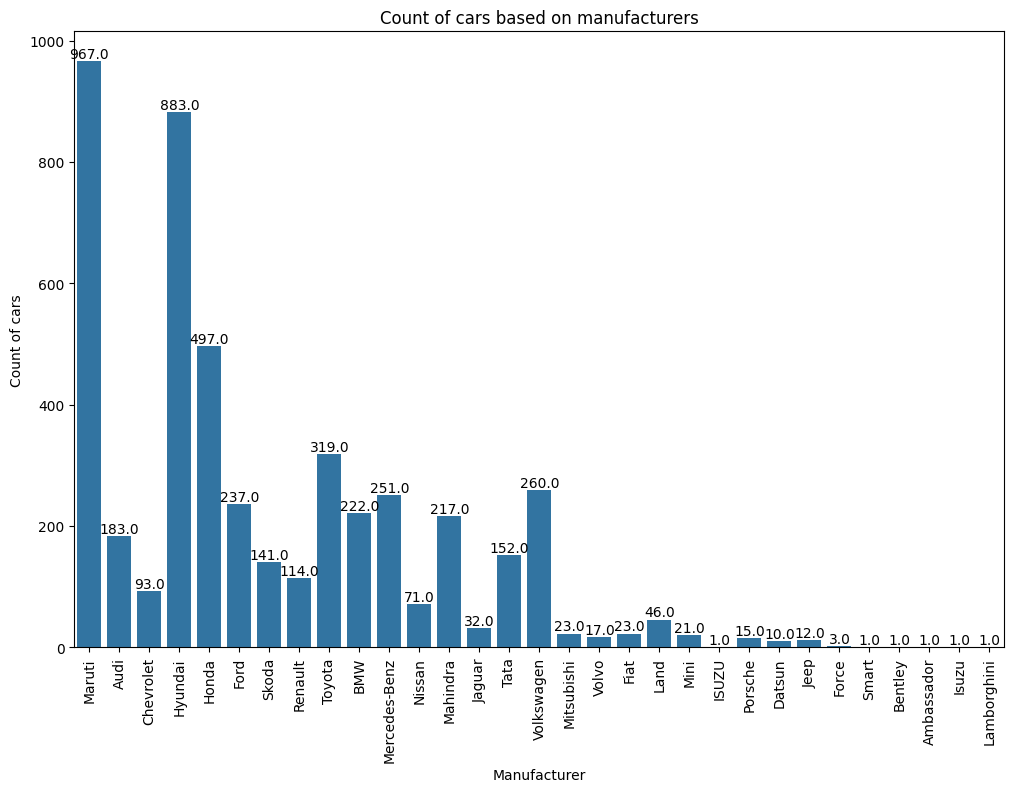

In [120]:
plt.figure(figsize = (12, 8))
plot = sns.countplot(x = 'Manufacturer', data = Xtrain)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of cars based on manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Count of cars")

In [121]:
Xtrain.drop("Name", axis = 1, inplace = True)
Xtest.drop("Name", axis = 1, inplace = True)

In [122]:
Xtrain["Manufacturer"]

1162        Maruti
1920        Maruti
5100          Audi
1506     Chevrolet
5533       Hyundai
           ...    
1180         Honda
3441    Volkswagen
1344        Toyota
4623        Maruti
1289         Honda
Name: Manufacturer, Length: 4815, dtype: object

In [123]:
curr_time = datetime.datetime.now()
Xtrain['Year'] = Xtrain['Year'].apply(lambda x : curr_time.year - x)
Xtest['Year'] = Xtest['Year'].apply(lambda x : curr_time.year - x)

In [124]:
Xtrain["Year"]

1162     8
1920     8
5100    12
1506    12
5533    17
        ..
1180    10
3441     9
1344    16
4623    15
1289     9
Name: Year, Length: 4815, dtype: int64

In [125]:
mileage_train = Xtrain["Mileage"].str.split(" ", expand = True)
mileage_test = Xtest["Mileage"].str.split(" ", expand = True)

Xtrain["Mileage"] = pd.to_numeric(mileage_train[0], errors = 'coerce')
Xtest["Mileage"] = pd.to_numeric(mileage_test[0], errors = 'coerce')

In [126]:
print(sum(Xtrain["Mileage"].isnull()))
print(sum(Xtest["Mileage"].isnull()))

2
0


In [127]:
from sklearn.impute import SimpleImputer
imputer1=SimpleImputer(strategy="mean")
Xtrain["Mileage"]= imputer1.fit_transform(Xtrain[["Mileage"]])
Xtest["Mileage"]=imputer1.transform(Xtest[["Mileage"]])

In [128]:
cc_train = Xtrain["Engine"].str.split(" ", expand = True)
cc_test = Xtest["Engine"].str.split(" ", expand = True)
Xtrain["Engine"] = pd.to_numeric(cc_train[0], errors = 'coerce')
Xtest["Engine"] = pd.to_numeric(cc_test[0], errors = 'coerce')

bhp_train = Xtrain["Power"].str.split(" ", expand = True)
bhp_test = Xtest["Power"].str.split(" ", expand = True)
Xtrain["Power"] = pd.to_numeric(bhp_train[0], errors = 'coerce')
Xtest["Power"] = pd.to_numeric(bhp_test[0], errors = 'coerce')

In [129]:
Xtrain["Engine"].fillna(Xtrain["Engine"].astype("float64").mean(), inplace = True)
Xtest["Engine"].fillna(Xtrain["Engine"].astype("float64").mean(), inplace = True)

Xtrain["Power"].fillna(Xtrain["Power"].astype("float64").mean(), inplace = True)
Xtest["Power"].fillna(Xtrain["Power"].astype("float64").mean(), inplace = True)

Xtrain["Seats"].fillna(Xtrain["Seats"].astype("float64").mean(), inplace = True)
Xtest["Seats"].fillna(Xtrain["Seats"].astype("float64").mean(), inplace = True)

# Data Processing



In [130]:
# Generate dummies and ensure both datasets have the same dummy columns
Xtrain = pd.get_dummies(Xtrain, columns=["Manufacturer", "Fuel_Type", "Transmission", "Owner_Type"])
Xtest = pd.get_dummies(Xtest, columns=["Manufacturer", "Fuel_Type", "Transmission", "Owner_Type"])

# Align the test set with the training set, adding missing columns in the test set
Xtest = Xtest.reindex(columns=Xtrain.columns, fill_value=0)

# Now apply StandardScaler
standardScaler = StandardScaler()
X_train = standardScaler.fit_transform(Xtrain)
X_test = standardScaler.transform(Xtest)


In [131]:
# Xtest = pd.get_dummies(Xtest,
#                          columns = ["Manufacturer", "Fuel_Type", "Transmission", "Owner_Type"],
#                          drop_first = True)

In [132]:
# standardScaler = StandardScaler()
# standardScaler.fit(Xtrain)
# X_train = standardScaler.transform(Xtrain)
# X_test = standardScaler.transform(Xtest)

# Training and predicting

In [133]:
# linearRegression = LinearRegression()
# linearRegression.fit(X_train, y_train)
# y_pred = linearRegression.predict(X_test)
# r2_score(y_test, y_pred)

In [134]:
# rf = RandomForestRegressor(n_estimators = 100)
# rf.fit(X_train, y_train)
# y_pred = rf.predict(X_test)
# r2_score(y_test, y_pred)

# jo m krri


In [135]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [136]:
lr = LinearRegression()
lr.fit(Xtrain,ytrain)

rf = RandomForestRegressor(random_state=10)
rf.fit(Xtrain,ytrain)

xgb = GradientBoostingRegressor(random_state=10)
xgb.fit(Xtrain,ytrain)

xg = XGBRegressor()
xg.fit(Xtrain,ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [137]:
y_pred1 = lr.predict(Xtest)
y_pred2 = rf.predict(Xtest)
y_pred3 = xgb.predict(Xtest)
y_pred4 = xg.predict(Xtest)

In [138]:
from sklearn import metrics
score1 = metrics.r2_score(ytest,y_pred1)
score2 = metrics.r2_score(ytest,y_pred2)
score3 = metrics.r2_score(ytest,y_pred3)
score4 = metrics.r2_score(ytest,y_pred4)

In [139]:
print(score1,score2,score3,score4)

0.6408199832264372 0.8739768899520692 0.8676640789321202 0.8678913307155923


In [140]:
final_data = pd.DataFrame({'Models':['LR','RF','GBR','XG'],
             "R2_SCORE":[score1,score2,score3,score4]})

In [141]:
final_data

,Models,R2_SCORE
0,LR,0.640820
1,RF,0.873977
2,GBR,0.867664
3,XG,0.867891


<BarContainer object of 4 artists>

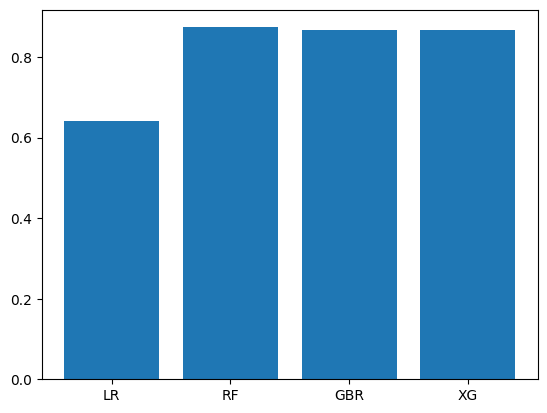

In [142]:
import matplotlib.pyplot as plt
plt.bar(final_data['Models'],final_data['R2_SCORE'])

In [143]:
from xgboost import XGBRegressor

# Train the XGBoost model
xgb_model = XGBRegressor()
xgb_model.fit(Xtrain, ytrain)

# Save the model using XGBoost's own method
xgb_model.save_model('xgb_model_car.json')  # JSON format, could also be a binary format with .bin

# To load the model later for prediction
loaded_xgb_model = XGBRegressor()
loaded_xgb_model.load_model('xgb_model_car.json')

